In [1]:
# Importing Libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv("train.csv")
df

,Date,Open,High,Low,Close,Volume
0,2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
1,2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2,2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
3,2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
4,2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900
...,...,...,...,...,...,...
1650,2022-07-25,2412.25,2429.44,2387.41,2402.95,29106300
1651,2022-07-26,2289.29,2307.08,2255.66,2280.27,48503400
1652,2022-07-27,2309.14,2404.25,2296.82,2395.54,43790900
1653,2022-07-28,2385.58,2443.26,2377.34,2434.89,25807000


In [3]:
# Converting the date attribute column from object to date-time format
df['Date'] = pd.to_datetime(df['Date'])
# replacing the given index with the dates and dropping the date attribute
df = df.set_index('Date')
df

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-04,1099.59,1110.75,1093.85,1109.64,66545000
2016-01-05,1117.47,1130.57,1112.75,1125.85,41227200
2016-01-06,1116.63,1138.68,1116.10,1133.04,42316800
2016-01-07,1122.00,1149.76,1117.56,1143.37,64899600
2016-01-08,1145.64,1149.96,1120.93,1122.88,52138900
...,...,...,...,...,...
2022-07-25,2412.25,2429.44,2387.41,2402.95,29106300
2022-07-26,2289.29,2307.08,2255.66,2280.27,48503400
2022-07-27,2309.14,2404.25,2296.82,2395.54,43790900


## Pre Processing and EDA

In [4]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

### Heatmap

,Open,High,Low,Close,Volume
Open,1.000000,0.999716,0.999748,0.999455,-0.173859
High,0.999716,1.000000,0.999541,0.999705,-0.166732
Low,0.999748,0.999541,1.000000,0.999692,-0.182352
Close,0.999455,0.999705,0.999692,1.000000,-0.175132
Volume,-0.173859,-0.166732,-0.182352,-0.175132,1.000000


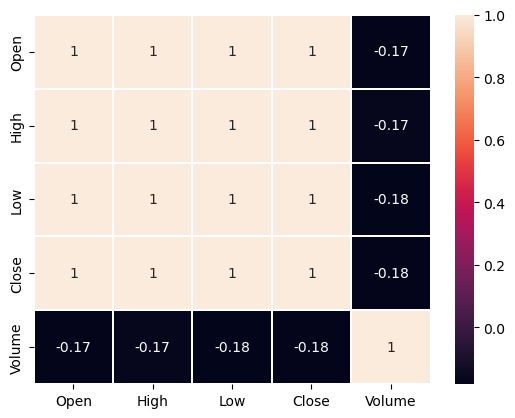

In [5]:
# Displaying the correlation between the attributes in the given dataset
correlation_map = sns.heatmap(df.corr(method='pearson'),annot =True,linewidth = 0.3)
df.corr()

### Closing price analysis

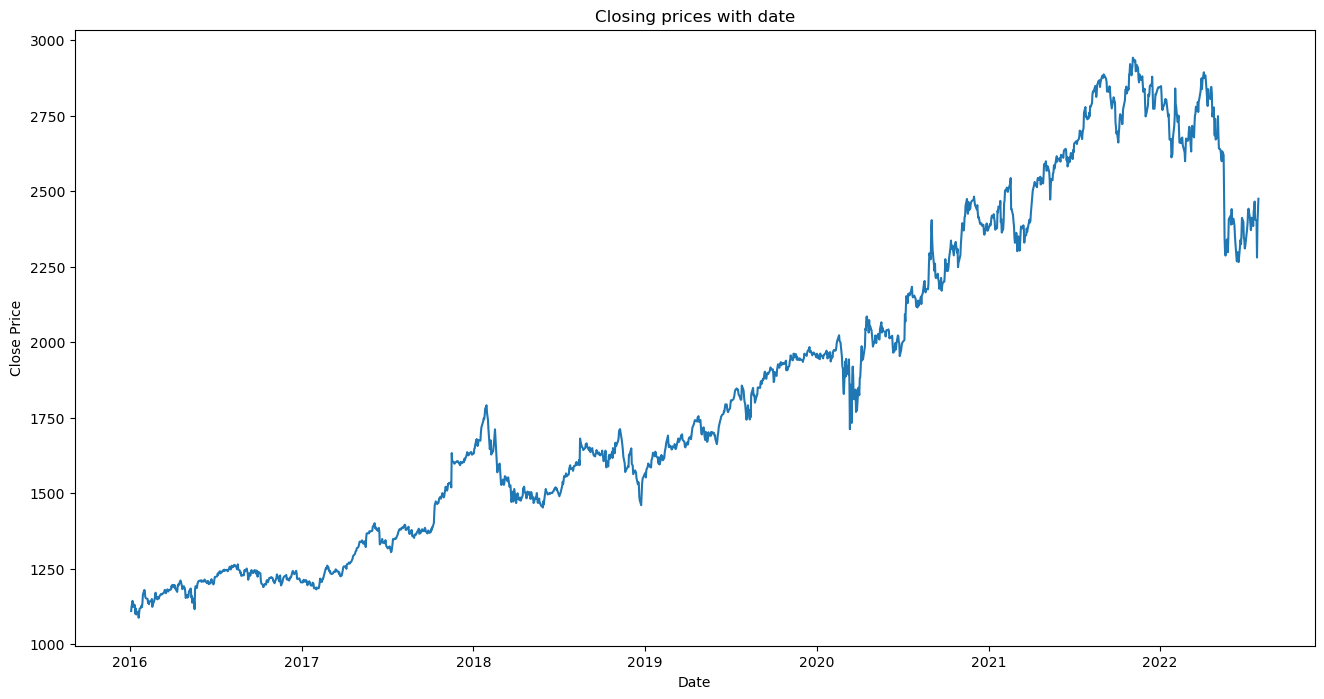

In [6]:
# Plot of how the closing price is varying with date
plt.figure(figsize=(16,8))
plt.title('Closing prices with date')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

### Plotting the boxplots of the attributes - understanding the distribution

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

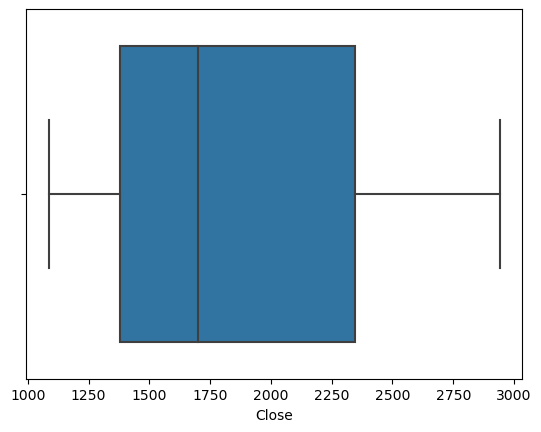

In [7]:
sns.boxplot(df['Close'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='High'>

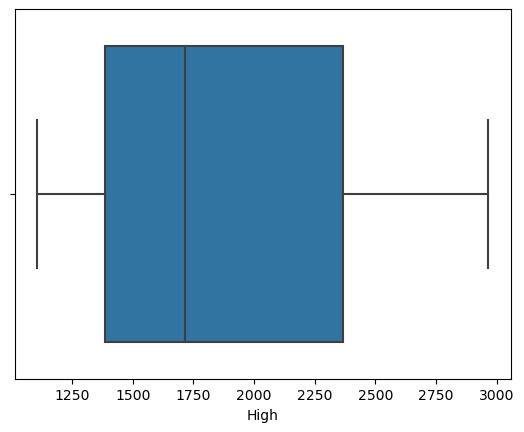

In [8]:
sns.boxplot(df['High'])

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Low'>

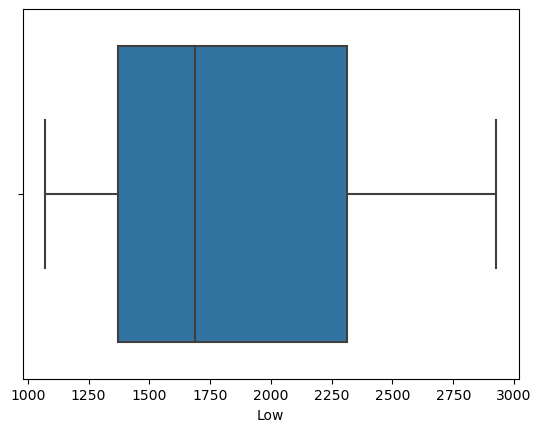

In [9]:
sns.boxplot(df['Low'])


### Dropping unwanted attributes

In [10]:
# From the heat map we observed that volume did not have any correlation with the close values hence we are dropping the volume column for further analysis
fin_df = df[['High','Open','Low', 'Close']]
fin_df

,High,Open,Low,Close
Date,,,,
2016-01-04,1110.75,1099.59,1093.85,1109.64
2016-01-05,1130.57,1117.47,1112.75,1125.85
2016-01-06,1138.68,1116.63,1116.10,1133.04
2016-01-07,1149.76,1122.00,1117.56,1143.37
2016-01-08,1149.96,1145.64,1120.93,1122.88
...,...,...,...,...
2022-07-25,2429.44,2412.25,2387.41,2402.95
2022-07-26,2307.08,2289.29,2255.66,2280.27
2022-07-27,2404.25,2309.14,2296.82,2395.54


In [11]:
# fin_df_test = np.square(fin_df_test)

## Model Building

### Isolating the target variable (Y) and generating the testing dataset (X)

In [12]:
# Selecting all other attributes other than "close" (Target attribute)
X = fin_df.iloc[:,fin_df.columns != 'Close']
# Selecting the target attribute
Y = fin_df['Close']

print(X.shape)  
print(Y.shape)

(1655, 3)
(1655,)


### Building the testing and training datasets

In [13]:
# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split

# Forming testing and training split with a 70:30 ratio
# x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.20,shuffle=False,stratify=None)
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.30,random_state = 2)

## Linear Regression

In [14]:
# Linear Regression Model 

lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
y_pred = lr_model.predict(x_test)


#### Performance metrics

In [15]:
# Linear Model Cross-Validation
from sklearn import model_selection
from sklearn.model_selection import KFold


kfold = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.97832904555423


In [16]:
# RMSE (Root Mean Square Error) and R2 value for the linear regression
from sklearn.metrics import mean_squared_error , r2_score
import math

lr_mse = math.sqrt(mean_squared_error(y_test,y_pred))
print('Linear Model Root mean square error', lr_mse)
print('Linear R2: ', r2_score(y_test, y_pred))

Linear Model Root mean square error 7.708687259940627
Linear R2:  0.999796444486839


## SVM Regressor

In [17]:
from sklearn.svm import SVR
svm_regressor = SVR(kernel='linear')
svm_model = svm_regressor.fit(x_train,y_train)
y_svm_pred = svm_model.predict(x_test)

#### Performance metrics

In [19]:
# Predicting the accuracy using K-Fold selection for the svm regressor
svm_kfold = model_selection.KFold(n_splits=2, shuffle=True)
results_kfold = model_selection.cross_val_score(svm_model, x_test, y_test.astype('int'), cv=svm_kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.97806540981128


In [20]:
# Printing the root mean square and R2 value for the SVM Regressor
svm_mse = math.sqrt(mean_squared_error(y_test,y_svm_pred))
print('SVM Model Root mean square error', svm_mse)
print('Linear R2: ', r2_score(y_test, y_pred))

SVM Model Root mean square error 7.860437140454485
Linear R2:  0.999796444486839


## KNN Regressor

In [21]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)

knn_y_pred = knn_model.predict(x_test)

In [22]:
# KNN Cross Validation
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold_knn = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(knn_model, x_test, y_test.astype('int'), cv=kfold_knn)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.93622778764319


In [23]:
from sklearn.metrics import mean_squared_error , r2_score
import math

knn_mse = math.sqrt(mean_squared_error(y_test,knn_y_pred))
print('KNN Root square error', knn_mse)
print('KNN R2: ', r2_score(y_test, knn_y_pred))

KNN Root square error 10.664063373678283
KNN R2:  0.9996104461951899


## Kernel Ridge Regression

In [24]:
## Kernel Ridge Regression

from sklearn.kernel_ridge import KernelRidge

kr_model =KernelRidge()
kr_model.fit(x_train,y_train)

y_pred_kr = kr_model.predict(x_test)

In [25]:
# Kernel Ridge Regression Cross Validation
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold_kridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(kr_model, x_test, y_test.astype('int'), cv=kfold_kridge)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.97819002052225


In [26]:
# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error , r2_score
import math

kr_mse = math.sqrt(mean_squared_error(y_test,y_pred_kr))
print('Ridge Model Root mean square error', kr_mse)
print('Ridge R2: ', r2_score(y_test, y_pred_kr))

Ridge Model Root mean square error 7.701826259563499
Ridge R2:  0.9997968066685948


## Ridge Regression


In [27]:
##Ridge Regression
from sklearn.linear_model import Ridge

r_model = Ridge()
r_model.fit(x_train,y_train)

y_pred_r = r_model.predict(x_test)

In [28]:
# Ridge Regression Cross Validation
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold_ridge = model_selection.KFold(n_splits=20, shuffle=True)
results_kfold = model_selection.cross_val_score(r_model, x_test, y_test.astype('int'), cv=kfold_ridge)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  99.97715384452394


In [29]:
# RMSE (Root Mean Square Error)
from sklearn.metrics import mean_squared_error , r2_score
import math

r_mse = math.sqrt(mean_squared_error(y_test,y_pred_r))
print('Ridge Model Root mean square error', r_mse)
print('Ridge R2: ', r2_score(y_test, y_pred_r))

Ridge Model Root mean square error 7.708690711020081
Ridge R2:  0.9997964443045806


# Model Selection
* Kernel Regression is showing the lowest rmse of 7.7018
* Linear regression and Rige regression are also showing good performance metrics with the least rmse among the models : 7.70869..
* All the models tested are also showing very good accuracy



* Ridge regression is a model which is bested suited for models suffering from multicollinearity as we see there is a strong correlation between all the participating attributes it proves to be a suitable model to choose.


# ----------------------------------------------------------------------------------------------------------------------------

## Prediction on given test.csv

In [30]:
df_test = pd.read_csv("test.csv")
df_test

,Date,Open,High,Low,Volume
0,2022-08-01,2455.71,2500.26,2447.87,24327600
1,2022-08-02,2466.68,2494.73,2447.99,19076300
2,2022-08-03,2473.29,2507.59,2449.39,27459700
3,2022-08-04,2475.98,2487.75,2419.88,23699600
4,2022-08-05,2414.66,2444.17,2409.01,18912400
5,2022-08-08,2444.97,2475.18,2433.03,18104900
6,2022-08-09,2446.62,2458.88,2427.54,16715500
7,2022-08-10,2481.04,2501.79,2463.66,22158000
8,2022-08-11,2500.23,2508.87,2467.32,18470800
9,2022-08-12,2494.85,2535.06,2486.40,18402700


### Pre Processing the predictive dataset 

In [31]:
# Storing the date to make the submission.csv
fin_date = df_test['Date']

# Converting the date attribute to date time 
df_test['Date'] = pd.to_datetime(df_test['Date'])
# Making date attribute the index of the dataset and dropping it
df_test = df_test.set_index('Date')

# Dropping volume attribute
fin_df_test = df_test[['High','Open','Low']]

fin_df_test

,High,Open,Low
Date,,,
2022-08-01,2500.26,2455.71,2447.87
2022-08-02,2494.73,2466.68,2447.99
2022-08-03,2507.59,2473.29,2449.39
2022-08-04,2487.75,2475.98,2419.88
2022-08-05,2444.17,2414.66,2409.01
2022-08-08,2475.18,2444.97,2433.03
2022-08-09,2458.88,2446.62,2427.54
2022-08-10,2501.79,2481.04,2463.66
2022-08-11,2508.87,2500.23,2467.32


In [ ]:
#fin_df_test = np.log(fin_df_test)

## Generating the prediction on the predictive dataset


In [32]:
# Generating the prediction by running the test dataset on the selected predictive model - linear regression
y_pred_fin = kr_model.predict(fin_df_test)

In [ ]:
#y_pred_fin = np.exp(y_pred_fin)
#fin_df_test = np.exp(fin_df_test)

## Making the submission csv file

In [33]:
# Converting the prediction into a dataframe
pred_close_df = pd.DataFrame(y_pred_fin, columns =['Close'])
pred_close_df

,Close
0,2485.839170
1,2474.068507
2,2481.464007
3,2438.500989
4,2434.208686
5,2459.812654
6,2440.640910
7,2483.499428
8,2479.643239
9,2520.881227


#### Checking if the forcasted values are under high and above low values given in the predictive dataset

In [34]:
np.array(df_test['High']) - np.array(pred_close_df['Close'])

array([14.42082978, 20.66149281, 26.12599286, 49.24901104,  9.96131436,
       15.36734646, 18.23908961, 18.29057173, 29.22676098, 14.17877251,
       11.83048576, 16.37556561, 15.597001  , 17.11185663, 32.81199961,
       26.36201685, 14.79749819, 14.50445805,  8.02873538, 73.26929645,
       15.90834569, 30.18750419, 27.26690517, 15.78571177, 44.75364917,
       33.08062809, 13.53255756, 16.80664949,  6.76626269, 11.30701591,
       46.68769678, 22.10865035, 31.32952085, 19.80554316,  9.78667109])

In [35]:
np.array(pred_close_df['Close']) - np.array(df_test['Low'])

array([37.96917022, 26.07850719, 32.07400714, 18.62098896, 25.19868564,
       26.78265354, 13.10091039, 19.83942827, 12.32323902, 34.48122749,
       24.17951424, 24.88443439, 43.372999  , 19.92814337,  8.20800039,
       11.65798315, 16.27250181, 18.51554195, 24.62126462, 24.79070355,
       34.63165431, 10.35249581, 14.01309483, 36.76428823, 17.18635083,
       15.62937191, 46.72744244, 23.97335051, 23.53373731, 15.62298409,
       20.66230322, 15.59134965, 14.36047915, 31.02445684, 26.90332891])

### Making the final submission dataframe

In [36]:
# Making the submission dataset
result = pd.concat([fin_date, pred_close_df], axis=1, join='inner')
display(result)
print(result.dtypes)

,Date,Close
0,2022-08-01,2485.839170
1,2022-08-02,2474.068507
2,2022-08-03,2481.464007
3,2022-08-04,2438.500989
4,2022-08-05,2434.208686
5,2022-08-08,2459.812654
6,2022-08-09,2440.640910
7,2022-08-10,2483.499428
8,2022-08-11,2479.643239
9,2022-08-12,2520.881227


Date      object
Close    float64
dtype: object


In [ ]:
# Generating the submission.csv
result.to_csv(r'submission.csv',index = False)